<a href="https://colab.research.google.com/github/helloitsmimi/esaa/blob/master/%EB%AF%B8%EB%8B%88%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_%EC%88%98%ED%95%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [1]:
#드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

#현재 작업 위치 이동
#띄어쓰기에 \붙일 것
%cd /content/drive/MyDrive/이화/ESAA/미니프로젝트1

Mounted at /content/drive
/content/drive/MyDrive/이화/ESAA/미니프로젝트1


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='NanumBarunGothic')

# 0. 탐색적 자료분석(EDA)
---
## 0-1) 일부 데이터 미리보기
+ title : 영화의 제목
+ distributor : 배급사
+ genre : 장르
+ release_time : 개봉일
+ time : 상영시간(분)
+ screening_rat : 상영등급
+ director : 감독이름
+ dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)
+ dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)
+ num_staff : 스텝수
+ num_actor : 주연배우수
+ box_off_num : 관객수

In [ ]:
df = pd.read_csv("movies_train.csv")
df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [ ]:
df.tail()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
595,해무,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.0,1,510,7,1475091
596,파파로티,(주)쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.0,1,286,6,1716438
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,NaN,0,123,4,2475
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,NaN,0,431,4,2192525
599,베를린,CJ 엔터테인먼트,액션,2013-01-30,120,15세 관람가,류승완,NaN,0,363,5,7166532


## 0-2) 데이터 요약
+ 600개의 데이터와 12개의 변수 

In [ ]:
df.shape

(600, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


## 0-3) 데이터의 요약통계량 확인

In [ ]:
pd.options.display.float_format = '{:.1f}'.format

In [ ]:
df.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.0,270.0,600.0,600.0,600.0,600.0
mean,100.9,1050442.9,0.9,151.1,3.7,708181.8
std,18.1,1791408.3,1.2,165.7,2.4,1828005.9
min,45.0,1.0,0.0,0.0,0.0,1.0
25%,89.0,20380.0,0.0,17.0,2.0,1297.2
50%,100.0,478423.6,0.0,82.5,3.0,12591.0
75%,114.0,1286568.6,2.0,264.0,4.0,479886.8
max,180.0,17615314.0,5.0,869.0,25.0,14262766.0


## 0-4) 결측치 확인 및 데이터 전처리

In [ ]:
df.isna().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
dtype: int64

- dir_prev_bfnum 변수에 결측값이 존재한다.

In [ ]:
# 결측값의 특성 확인
df[df['dir_prev_bfnum'].isna()].head(3)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
6,길위에서,백두대간,다큐멘터리,2013-05-23,104,전체 관람가,이창재,NaN,0,32,5,53526
8,"1789, 바스티유의 연인들",유니버설픽쳐스인터내셔널코리아,뮤지컬,2014-09-18,129,전체 관람가,정성복,NaN,0,3,5,4778


- dir_prev_bfnum이 결측값으로 존재하는 데이터들은 전부 dir_prev_num이 0인 영화들이다. 즉, 감독의 이전작품이 존재 하지 않은 경우이다. 따라서 dir_prev_bfnum에 있는 결측값은 전부 0으로 채운다.

In [ ]:
df['dir_prev_bfnum'].fillna(0, inplace=True)

+ release_time은 시간에 관련된 데이터인데 int형으로 인식되고 있다. release_time을 datetime형식으로 변환한다.

In [ ]:
df['release_time']=pd.to_datetime(df['release_time'])

# 1. 장르

## 1-1) 장르별 관객 수 분석

### 변수 살펴보기

In [6]:
# 장르 종류
df['genre'].unique()

array(['액션', '느와르', '코미디', '다큐멘터리', '뮤지컬', '드라마', '멜로/로맨스', '공포', '서스펜스',
       '애니메이션', '미스터리', 'SF'], dtype=object)

In [7]:
# 장르별 개봉한 영화 개수
df.groupby('genre')['genre'].count().sort_values(ascending=False)

genre
드라마       221
다큐멘터리      93
멜로/로맨스     78
코미디        53
공포         42
액션         28
느와르        27
애니메이션      21
미스터리       17
SF         13
뮤지컬         5
서스펜스        2
Name: genre, dtype: int64

In [8]:
# 상위 관객수 10개의 장르(흥행 영화 순위)
df.sort_values(by='box_off_num', ascending=False)[['genre','box_off_num']].head(10)

,genre,box_off_num
372,드라마,14262766
362,느와르,12983841
530,코미디,12811435
498,액션,12706663
460,드라마,12323595
122,드라마,11374879
496,SF,9350351
101,드라마,9135806
505,SF,8666208
476,코미디,8659725


In [9]:
# 하위 관객수 10개의 장르
df.sort_values(by='box_off_num')[['genre', 'box_off_num']].tail(10)

,genre,box_off_num
476,코미디,8659725
505,SF,8666208
101,드라마,9135806
496,SF,9350351
122,드라마,11374879
460,드라마,12323595
498,액션,12706663
530,코미디,12811435
362,느와르,12983841
372,드라마,14262766


### 시각화

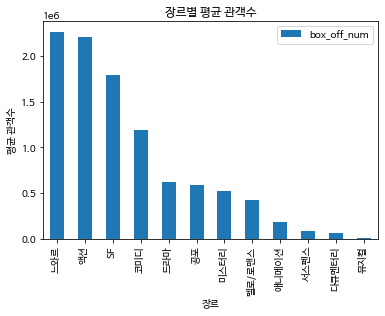

In [11]:
# 장르별 평균 관객수
TotalByGenre = df[['genre', 'box_off_num']].groupby('genre').mean().sort_values(by='box_off_num', ascending=False)
TotalByGenre.plot(kind='bar')

plt.title("장르별 평균 관객수")
plt.xlabel("장르")
plt.ylabel("평균 관객수")
plt.show()

### 분석
- 당시 개봉한 영화 중 드라마 장르가 가장 많았고 상위 관객수 10개의 장르(즉, 흥행 영화 순위)를 확인해본 결과 역시 드라마 장르의 비중이 높았다. 하지만 드라마 장르의 평균 관객수는 많지 않은 것을 확인할 수 있다.
- 당시 드라마 장르가 흥행함에 따라 많은 드라마 장르의 영화가 개봉하였던 것으로 보인다. 하지만 개봉한 영화가 많은 만큼 흥행에 실패한 영화 또한 많았을 것이다. 실제로 하위 관객수 10개의 장르를 확인해본 결과에서도 드라마 장르의 비중이 높게 나타난 것을 확인할 수 있다. 성적이 저조했던 많은 드라마 장르의 영화가 반영된 결과, 그래프에 상에서는 드라마 장르의 평균 관객수가 낮게 나온 것으로 생각된다.

## 1-2) 장르별 스텝 수 분석
### 변수 살펴보기

In [12]:
# 상위 스텝수 10개의 장르
df.sort_values(by='num_staff', ascending=False)[['genre','num_staff']].head(10)

,genre,num_staff
372,드라마,869
505,SF,868
201,액션,719
320,액션,687
477,느와르,683
124,드라마,650
310,드라마,642
498,액션,628
487,드라마,612
48,액션,600


In [13]:
# 하위 스텝수 10개의 장르
df.sort_values(by='num_staff')[['genre', 'box_off_num']].tail(10)

,genre,box_off_num
48,액션,1177435
487,드라마,1762733
498,액션,12706663
310,드라마,470308
124,드라마,3849696
477,느와르,2260512
320,액션,7482180
201,액션,2192276
505,SF,8666208
372,드라마,14262766


### 시각화

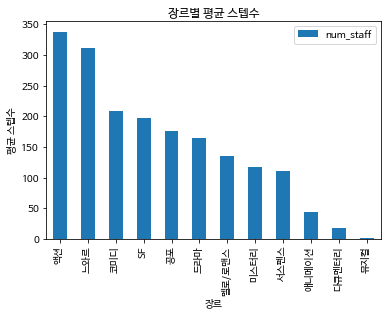

In [14]:
# 장르별 평균 스텝수
TotalByGenre = df[['genre', 'num_staff']].groupby('genre').mean().sort_values(by='num_staff', ascending=False)
TotalByGenre.plot(kind='bar')

plt.title("장르별 평균 스텝수")
plt.xlabel("장르")
plt.ylabel("평균 스텝수")
plt.show()

### 분석

* 지금까지 역대 영화 제작비 순위에 있는 영화를 조사해본 결과 다음과 같다.  
캐리비안의 해적 **(장르: 액션)**  
어벤져스 **(장르: 액션/SF)**  
저스티스 리그 **(장르: 액션/SF)**  
스타워즈 **(장르: 액션/SF)**

* 이에 따라, 액션, SF 장르 등이 제작비가 많이 들것이라 추측했고, 많은 제작비가 들어갈수록 영화 제작에 필요한 스텝수도 많을 것이라 예상했다. 그래프를 살펴보면 예상했던 것처럼 **액션** 영화의 평균 스텝수가 가장 많은 것을 확인할 수 있다. **SF** 장르도 상위에 있는 것을 확인할 수 있다.
* 예상 외로, **코미디** 장르에 평균 스텝수가 높게 나타났다. 위에 1-1) 장르별 관객 수 분석 부분에서 당시 코미디 영화가 대세였을 것이라고 추측했는데, 영화 흥행에 제작비가 미치는 영향이 크기 때문에 대세인 코미디 영화에 많은 인력을 들인 것으로 예상된다.


## 1-3) 장르별 상영등급

### 변수 살펴보기

In [15]:
# 상영등급
df['screening_rat'].unique()

array(['청소년 관람불가', '15세 관람가', '전체 관람가', '12세 관람가'], dtype=object)

### 시각화

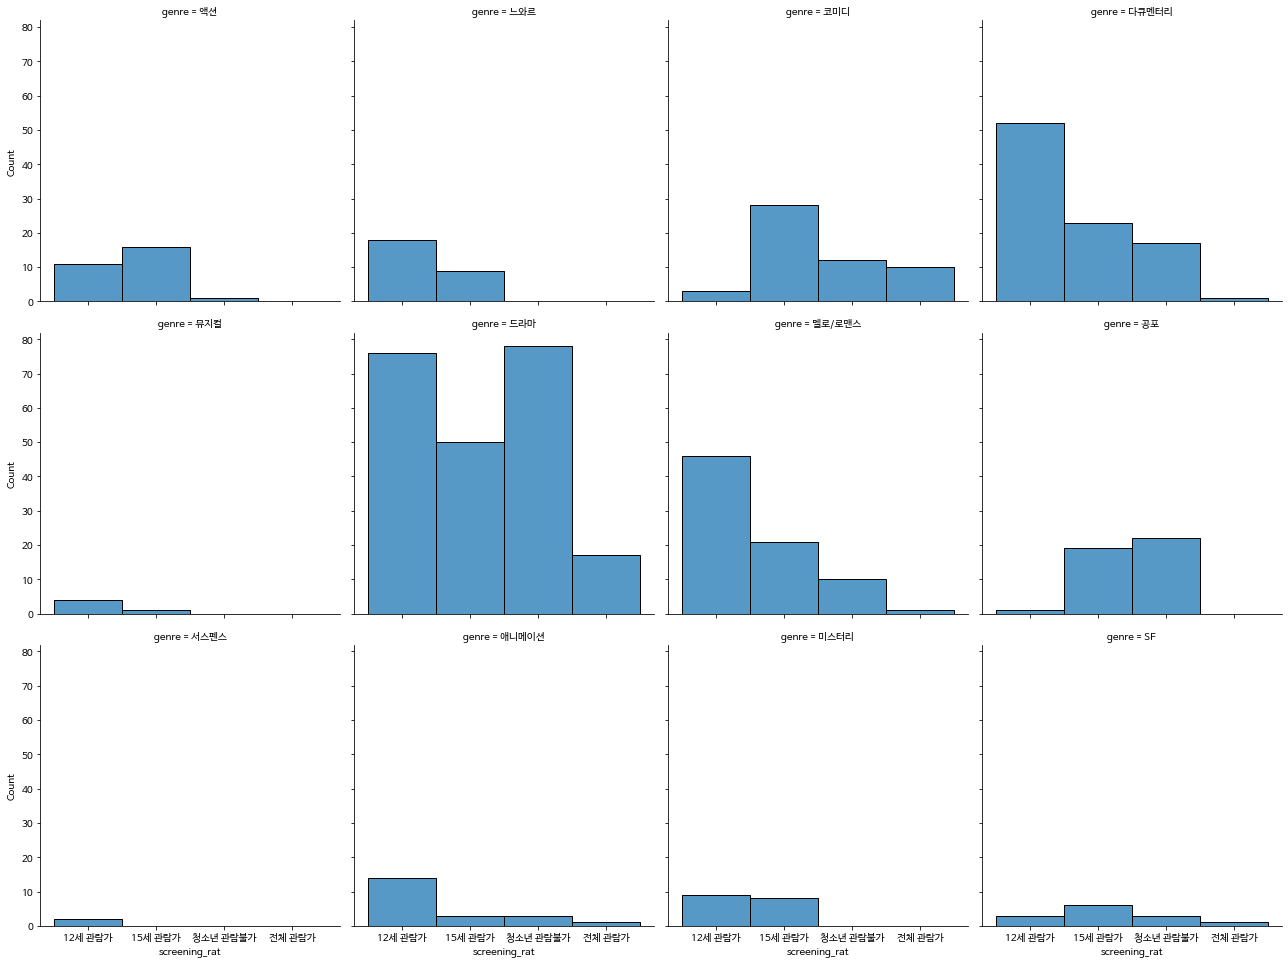

In [16]:
facet = sns.FacetGrid(df, col='genre', col_wrap=4, height=4.5)
facet.map(sns.histplot, 'screening_rat')

### 분석

* *느와르, 다큐멘터리, 뮤지컬, 멜로/로맨스, 서스펜스, 애니메이션, 미스테리* 장르는 **12세 관람가**가 가장 많았다.
* *액션, 코미디, SF* 장르는 **15세 관람가**가 가장 많았다.
* *드라마, 공포* 장르는 **청소년 관람불가**가 가장 많았다.
* **전체 관람가**의 비중이 가장 높은 장르는 하나도 없다.
* **공포**영화는 청소년 관람불가의 비중이 가장 높을거라 예상했는데 예상과 동일한 결과 나왔다.
* **애니메이션** 영화는 전체관람가의 비중이 가장 높을거라 예상했는데 오히려 전체 관람가의 비중이 가장 적었다.

# 2. 감독

## 2-1) 감독 별 관객 수 상위 10위

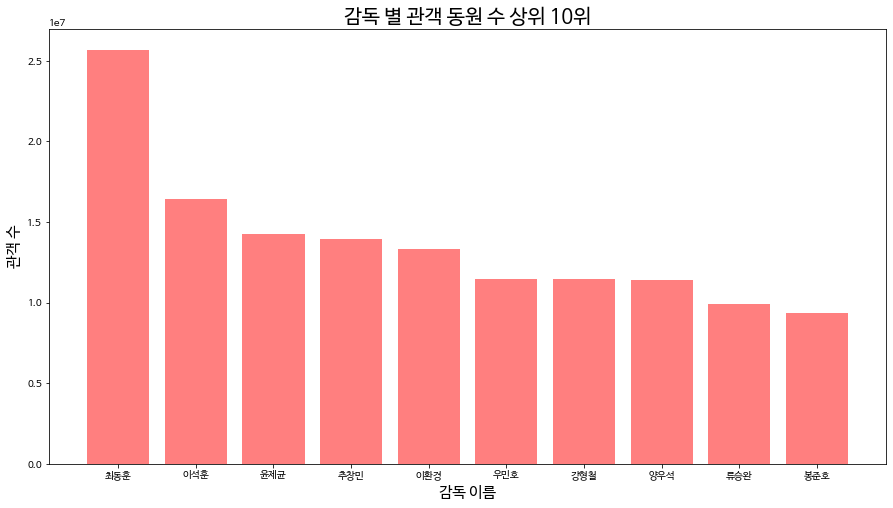

In [5]:
top_director = df.groupby("director").box_off_num.sum().sort_values(ascending=False)[:10]

plt.figure(figsize=(15,8))

plt.bar(top_director.index, top_director, color='red', alpha=0.5)

plt.xlabel("감독 이름", fontsize=15)
plt.ylabel("관객 수", fontsize=15)
plt.title("감독 별 관객 동원 수 상위 10위", fontsize=20)

plt.show()

최동훈 감독이 유일하게 2000만명 이상의 관객을 동원했고, 이석훈 감독, 윤제균 감독이 그 뒤를 따랐다.
류승완 감독, 봉준호 감독은 1000만명 이상의 관객을 동원하지 못했다.<br/>
봉준호 감독의 경우, 데이터에 해당 감독의 영화가 `설국열차` 하나만 존재하기 때문에 이와 같은 결과가 나왔다.

## 2-2) 감독의 이전 영화 평균 관객 수 별 주연배우 수

In [ ]:
df.head(2)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.0,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.5,2,387,3,7072501


In [ ]:
df['dir_prev_bfnum'].describe()

count    6.000000e+02
mean     4.726993e+05
std      1.309474e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.761416e+05
max      1.761531e+07
Name: dir_prev_bfnum, dtype: float64

In [ ]:
df[['dir_prev_bfnum', 'num_actor']].head(2)

,dir_prev_bfnum,num_actor
0,0.0,2
1,1161602.5,3


In [ ]:
avg_box = df.groupby('dir_prev_bfnum').num_actor.mean().astype('int')
avg_box

dir_prev_bfnum
0.0            3
1.0            2
7.0            5
8.0            2
17.0           4
              ..
7838528.5      4
7855474.0      5
8223342.0     11
8801639.0      3
17615314.0     3
Name: num_actor, Length: 246, dtype: int64

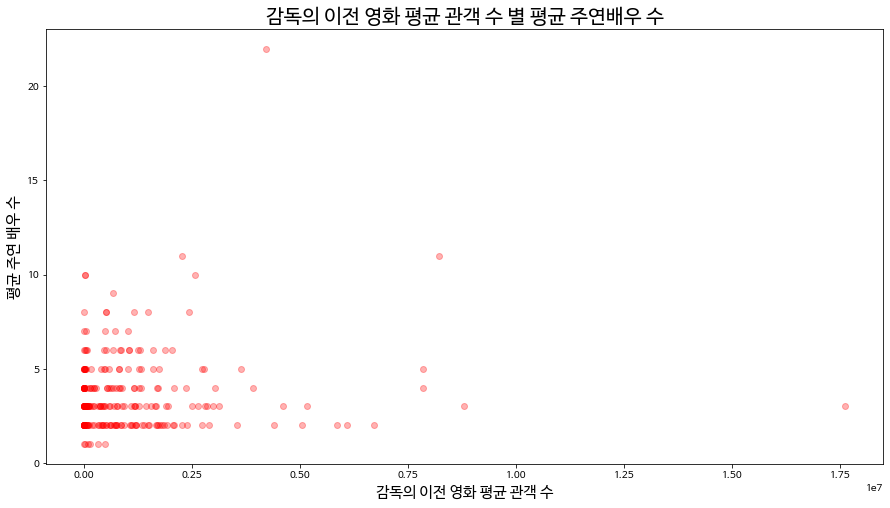

In [ ]:
plt.figure(figsize=(15,8))

plt.scatter(avg_box.index, avg_box, color='red', alpha=0.3)

plt.xlabel("감독의 이전 영화 평균 관객 수", fontsize=15)
plt.ylabel("평균 주연 배우 수", fontsize=15)
plt.title("감독의 이전 영화 평균 관객 수 별 평균 주연배우 수", fontsize=20)


plt.show()

대부분 영화의 관객 수가 250만명 이하였고, 주연배우 수는 2~3명이었다.<br/>
관객 수가 500만명이 넘는 경우 주연배우 수가 5명을 넘는 영화는 드물었다.<br/>
관객 수와 주연 배우 수 사이의 상관관계는 없는 것으로 보인다.

## 2-3) 감독의 이전 제작 영화 개수 별 주연배우 수

In [ ]:
df.head(2)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.0,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.5,2,387,3,7072501


In [ ]:
df[['dir_prev_num', 'num_actor']].head(2)

,dir_prev_num,num_actor
0,0,2
1,2,3


In [24]:
avg_actor = df.groupby('dir_prev_num').num_actor.mean()
avg_actor

dir_prev_num
0    3.733333
1    3.451327
2    3.709302
3    4.297872
4    3.250000
5    4.000000
Name: num_actor, dtype: float64

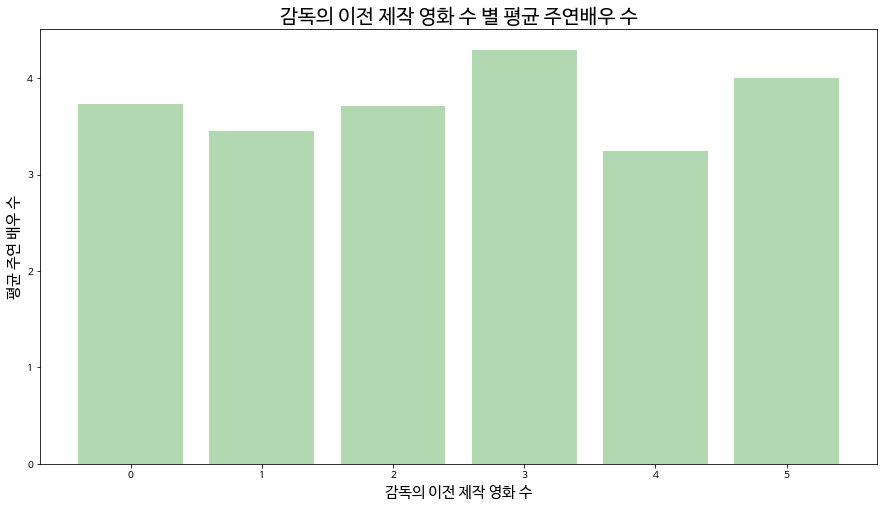

In [ ]:
plt.figure(figsize=(15,8))

plt.bar(avg_actor.index, avg_actor, color='green', alpha=0.3)

plt.xlabel("감독의 이전 제작 영화 수", fontsize=15)
plt.ylabel("평균 주연 배우 수", fontsize=15)
plt.title("감독의 이전 제작 영화 수 별 평균 주연배우 수", fontsize=20)

plt.show()

감독의 이전 제작 영화 수와 관계없이 평균 주연 배우 수는 3~4명으로 나타났다.

## 2-4) 감독의 이전 영화 평균 관객수 별 관객 수

In [ ]:
df[['dir_prev_num', 'box_off_num']].head(2)

,dir_prev_num,box_off_num
0,0,23398
1,2,7072501


In [25]:
box_per_bfnum = df.groupby('dir_prev_bfnum').box_off_num.mean().astype('int')
box_per_bfnum

dir_prev_bfnum
0.0            349204
1.0            483387
7.0              4941
8.0            283449
17.0            94875
               ...   
7838528.5     4015364
7855474.0     2541603
8223342.0     7453715
8801639.0     2130645
17615314.0          8
Name: box_off_num, Length: 246, dtype: int64

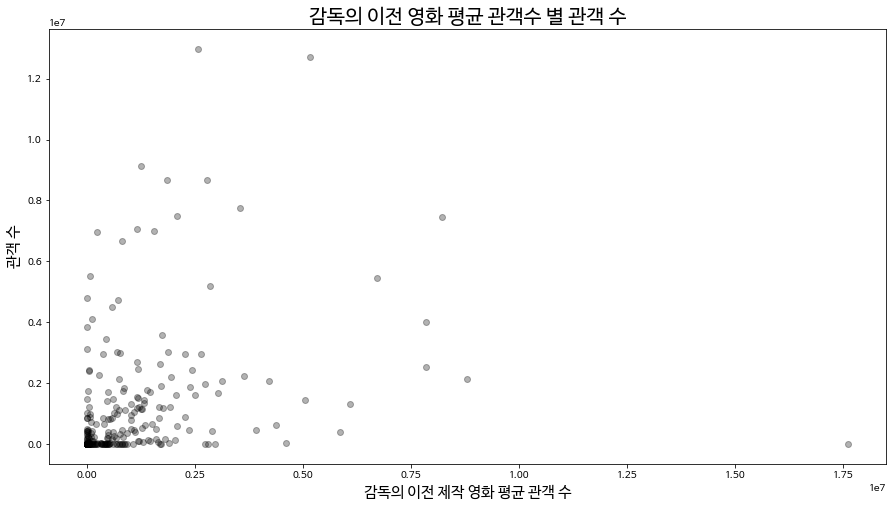

In [28]:
plt.figure(figsize=(15,8))

plt.scatter(box_per_bfnum.index, box_per_bfnum, color='black', alpha=0.3)

plt.xlabel("감독의 이전 제작 영화 평균 관객 수", fontsize=15)
plt.ylabel("관객 수", fontsize=15)
plt.title("감독의 이전 영화 평균 관객수 별 관객 수", fontsize=20)

plt.show()

감독의 이전 제작 영화 평균 관객 수가 천만명을 넘는 경우는 하나 뿐이었고, 대부분 250만명 이전에 분포했다. <br/>
`이전 제작 영화 평균 관객 수가 250만명 이하`인 경우, 대부분 이번 영화의 관객 수도 200만명 이하 였다.<br/>
관객 수가 500만명을 넘는 영화의 대부분은 이전 제작 영화 평균 관객수가 250만명 이하였다. <br/>
이전 영화 평균 관객 수와 관객 수 사이의 관계는 없는 것으로 보인다.

# 3. 상영 정보

## 3-1) 상영시간 별 관객 수
+ 사용한 변수: `time`, `box_off_num`

Text(0, 0.5, '관객 수')

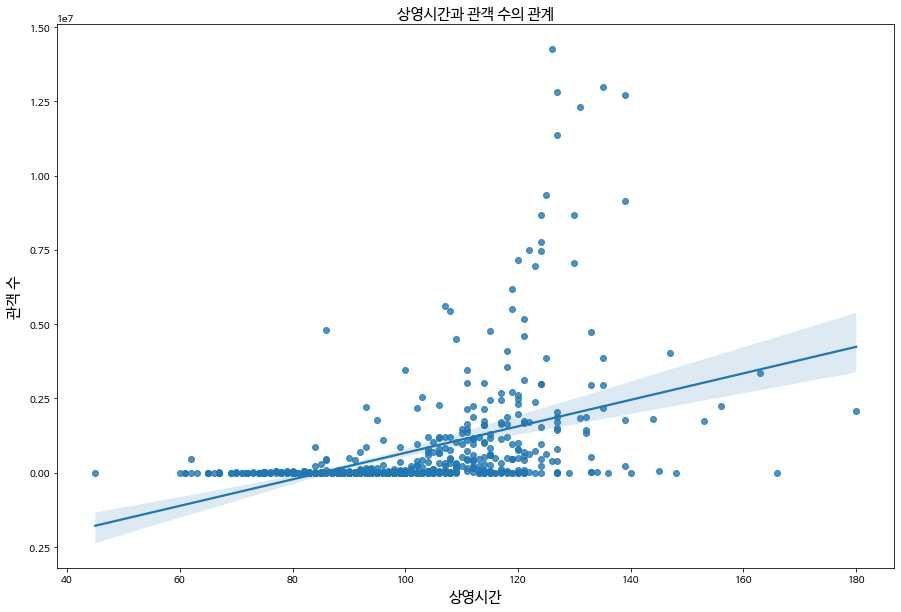

In [ ]:
ax = plt.subplots(figsize = (15,10))
ax = sns.regplot(x = df.time, y = df.box_off_num)
ax.set_title('상영시간과 관객 수의 관계', fontsize=15)
ax.set_xlabel('상영시간', fontsize=15)
ax.set_ylabel('관객 수', fontsize=15)

상영시간이 120-140분 사이인 경우 관객수가 높은 영화가 분포함을 알 수 있다. 상영시간이 100분 이하인 경우 급격히 감소함을 알 수 있다. 상영시간이 140분 이상인 경우 역시 높은 관객 수의 영화가 거의 없음을 알 수 있다. 

## 3-2) 상영시간 별 주연배우 수 
+ 사용한 변수: `time`, `num_actor`

Text(0, 0.5, '주연배우 수')

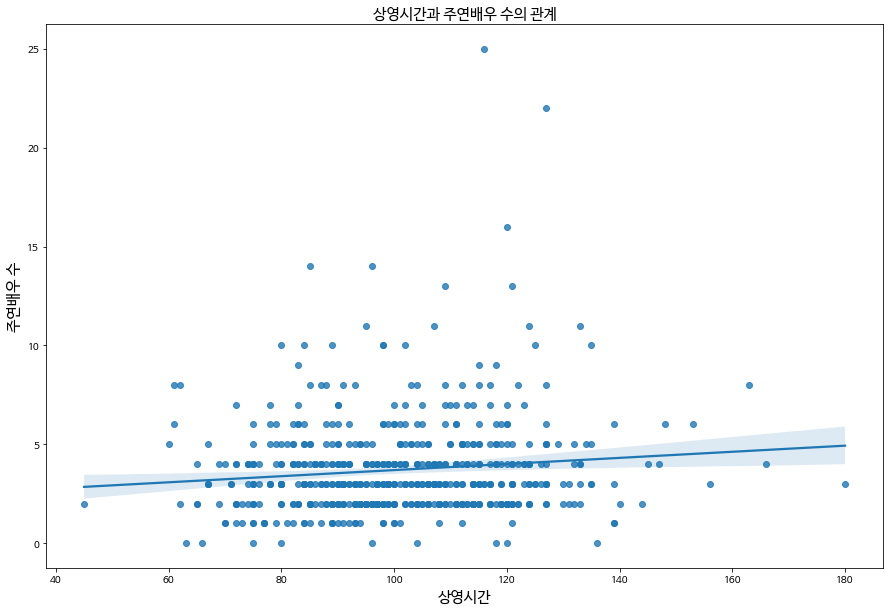

In [ ]:
# 상영시간과 주연배우 수 산점도
ax = plt.subplots(figsize = (15,10))
ax = sns.regplot(x = df.time, y = df.num_actor)
ax.set_title('상영시간과 주연배우 수의 관계', fontsize=15)
ax.set_xlabel('상영시간', fontsize=15)
ax.set_ylabel('주연배우 수', fontsize=15)

상영시간과 주연배우의 수 사이의 유의한 상관관계가 없음을 알 수 있다. 

## 3-3) 상영등급 별 관객 수

- 사용한 변수: `screening_rat`, `box_off_num`

In [ ]:
# 상영등급 개수 확인
df['screening_rat'].value_counts()

청소년 관람불가    204
15세 관람가     202
12세 관람가     102
전체 관람가       92
Name: screening_rat, dtype: int64

In [ ]:
# 상영등급별 평균 관객 수 구하기
rate_aud = df.groupby('screening_rat')['box_off_num'].mean()
print(rate_aud)

screening_rat
12세 관람가     8.449809e+05
15세 관람가     1.247519e+06
전체 관람가      1.351005e+05
청소년 관람불가    3.641813e+05
Name: box_off_num, dtype: float64


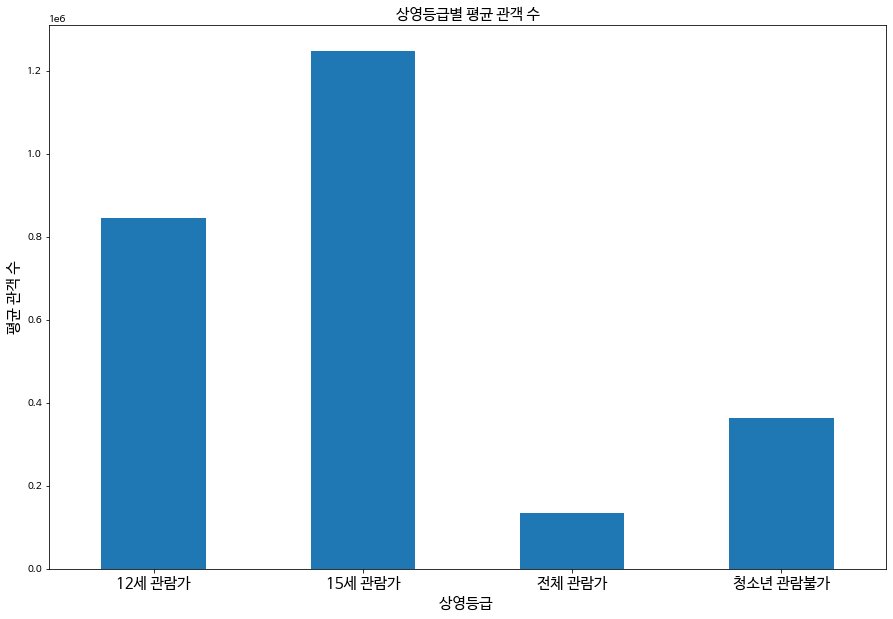

In [ ]:
# barplot
plt.figure(figsize = (15,10))
rate_aud.plot(kind='bar')
plt.title('상영등급별 평균 관객 수', fontsize=15)
plt.xlabel('상영등급', fontsize=15)
plt.ylabel('평균 관객 수', fontsize=15)
plt.xticks(rotation=360, fontsize=15)
plt.show()

+ 15세 관람가, 12세 관람가, 청소년 관람불가, 전체 관람가 순으로 평균 관객 수가 많음을 알 수 있다.

## 3-4) 상영등급 별 상영시간

In [ ]:
rate_time = df.groupby('screening_rat')['time'].mean()
print(rate_time)

screening_rat
12세 관람가     101.549020
15세 관람가     106.935644
전체 관람가       89.847826
청소년 관람불가     99.475490
Name: time, dtype: float64


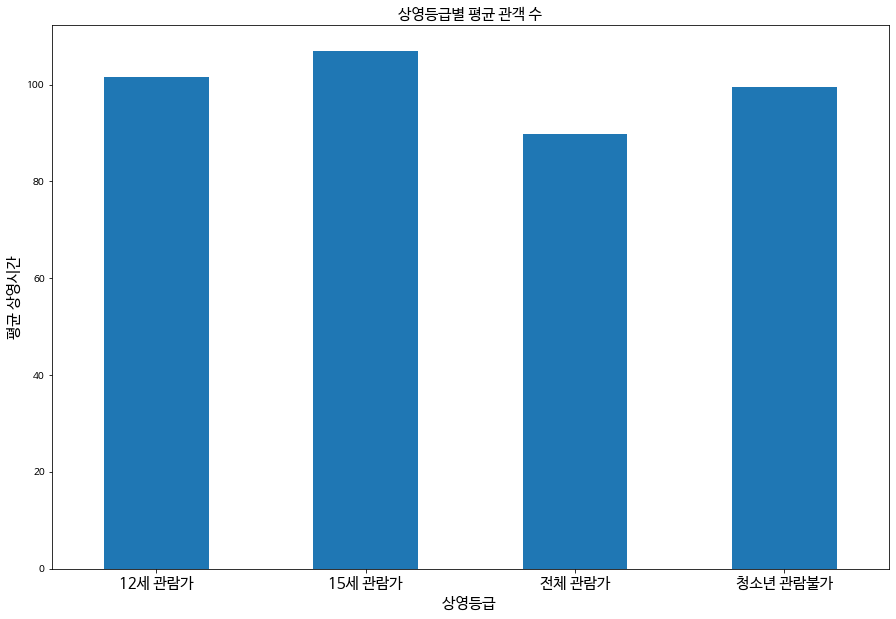

In [ ]:
# barplot
plt.figure(figsize = (15,10))
rate_time.plot(kind='bar')
plt.title('상영등급별 평균 관객 수', fontsize=15)
plt.xlabel('상영등급', fontsize=15)
plt.ylabel('평균 상영시간', fontsize=15)
plt.xticks(rotation=360, fontsize=15)
plt.show()

15세 관람가, 12세 관람가, 청소년 관람불가, 전체 관람가 순으로 평균 상영시간이 길다는 것을 알 수 있다. 이는 어린이와 청소년을 포함한 전체 관람가의 경우 타깃층을 고려해 상영시간이 적다는 점을 보아 타당하다. 

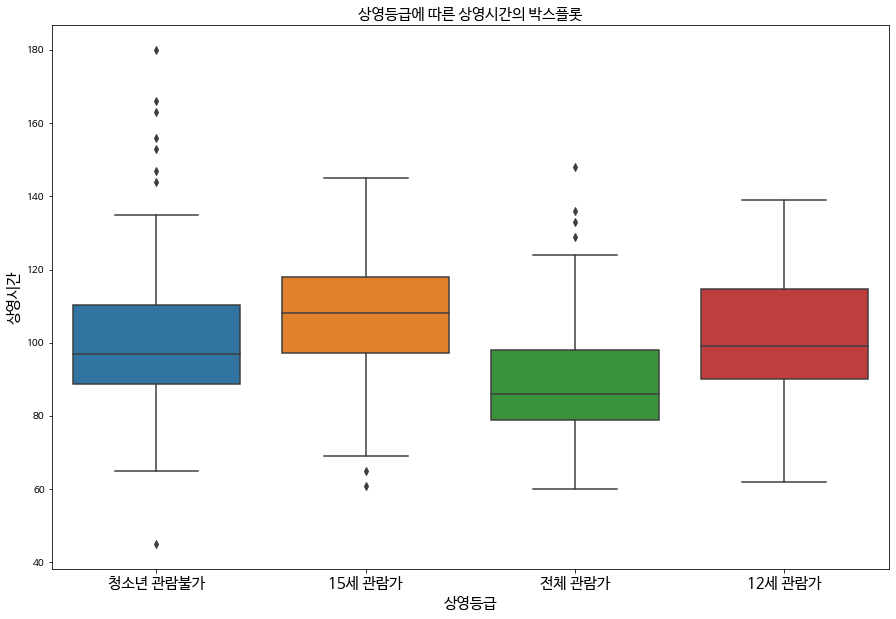

In [ ]:
plt.figure(figsize = (15,10))
ax = sns.boxplot(x = 'screening_rat', y = 'time',data=df)
ax.set_title('상영등급에 따른 상영시간의 박스플롯',fontsize=15)
ax.set_xlabel('상영등급',fontsize=15)
ax.set_ylabel('상영시간',fontsize=15)
plt.xticks(rotation=360, fontsize=15)
plt.show()

전체 관람가가 다른 상영등급에 비해 전반적인 상영시간이 짧음을 알 수 있다. 청소년 관람불가의 경우 아웃라이어 점들이 상영시간이 긴 쪽으로 여러개 있다는 것을 보아 상영시간의 variation이 넓음을 알 수 있다. 

# 4. 개봉 정보

## 4-1) 배급사 별 장르

In [ ]:
# 각 배급사 별 제작 영화 개수 확인 > 대부분 10개 이하의 영화를 제작한 배급사임을 확인할 수 있다. 
df['distributor'].value_counts()

CJ 엔터테인먼트        54
롯데엔터테인먼트         52
(주)NEW           30
(주)마운틴픽쳐스        29
(주)쇼박스           26
                 ..
OAL(올)            1
(주)에이원 엔터테인먼트     1
(주)콘텐츠 윙          1
위더스필름             1
퍼스트런              1
Name: distributor, Length: 169, dtype: int64

In [ ]:
# 11개 이상의 영화를 제작한 배급사만 추출하여 db라는 변수로 저장
db = df['distributor'].value_counts()[df['distributor'].value_counts()>10]
db

CJ 엔터테인먼트    54
롯데엔터테인먼트     52
(주)NEW       30
(주)마운틴픽쳐스    29
(주)쇼박스       26
인디스토리        26
골든타이드픽처스     15
(주) 케이알씨지    14
Name: distributor, dtype: int64

In [ ]:
# 배급사, 장르로 groupby하여 각 배급사의 장르별 영화 수를 db_genre라는 변수로 저장
db_genre = df.groupby(['distributor','genre'])['title'].count().reset_index()
db_genre.columns = ['distributor', 'genre', 'num']

In [ ]:
db_genre

,distributor,genre,num
0,(주) 브릿지웍스,멜로/로맨스,1
1,(주) 브릿지웍스,코미디,2
2,(주) 액티버스엔터테인먼트,드라마,1
3,(주) 액티버스엔터테인먼트,멜로/로맨스,1
4,(주) 영화사조제,SF,1
...,...,...,...
303,한국YWCA연합회,다큐멘터리,1
304,홀리가든,다큐멘터리,1
305,홀리가든,드라마,3
306,화앤담이엔티,드라마,1


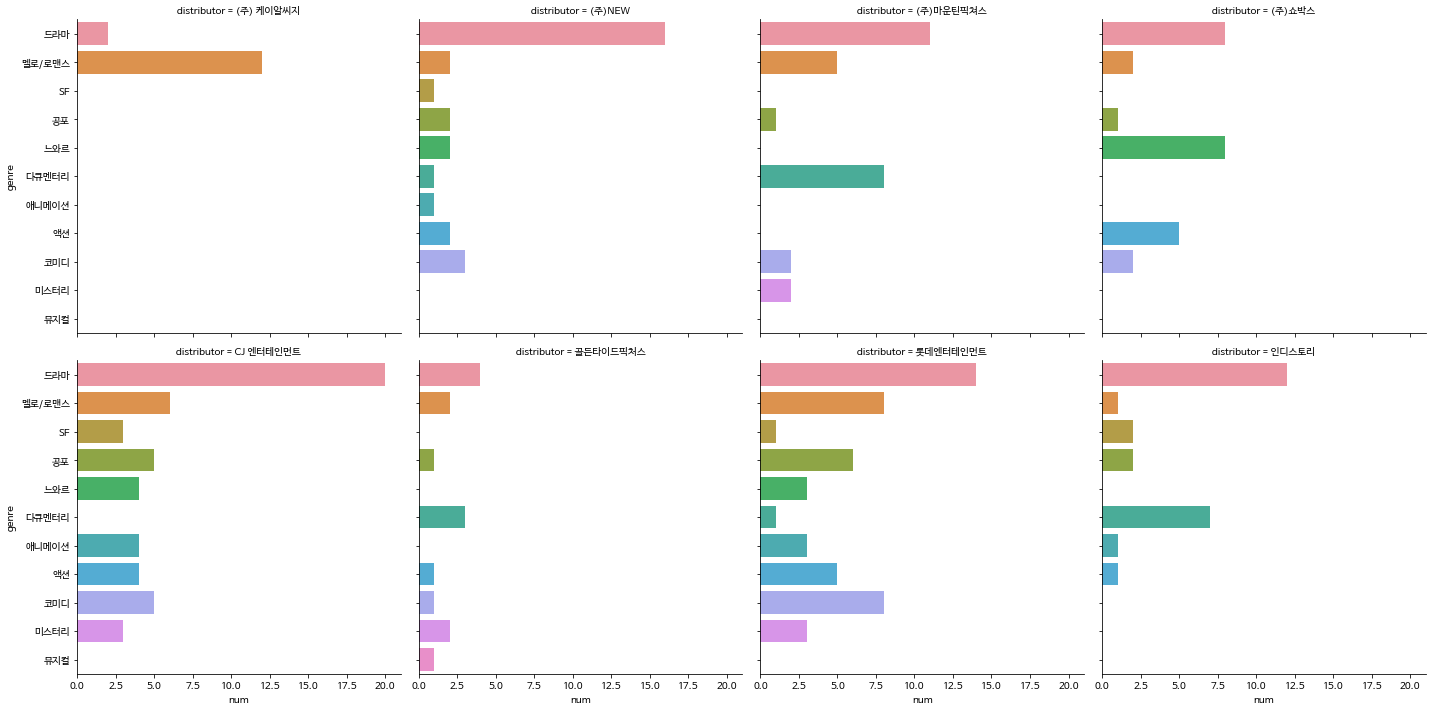

In [ ]:
# db_genre(전체 배급사 포함)에서 db에 해당하는 데이터 목록만 추출하여 df_distributor_genre라는 변수로 저장
df_distributor_genre = db_genre[db_genre['distributor'].isin(db.index)]

# 각 배급사의 장르별 영화 수에 대한 바 그래프 생성
axes = sns.catplot(data=df_distributor_genre, x='num', y='genre', kind='bar', col='distributor', col_wrap=4)

- 결론
  + 드라마 장르는 대부분의 배급사에서 제작되는 영화 장르임을 확인할 수 있다.
  + CJ 엔터테이먼트와 NEW 배급사는 대부분의 장르의 영화를 제작한다.
  + 상대적으로 마운틴픽쳐스, 골든타이드픽처스, 인디스토리는 다큐멘터리 영화를 주로 제작하는 배급사라는 것을 알 수 있다.
  + 롯데엔터테인먼트는 드라마 장르를 제외하면 멜로/로맨스, 공포, 코미디 장르의 영화를 주로 제작한다.
  + 쇼박스는 느와르, 액션 장르를 주로 제작한다.


## 4-2) 배급사 별 스텝 수

In [ ]:
# 배급사 별 평균 스텝수를 구한 후 staff_mean 변수에 저장
staff_mean = df[['distributor','num_staff']].groupby('distributor').mean().sort_values('num_staff',ascending=False)

# 대부분 평균 100명 이하의 스텝이 영화 제작에 참여 > 평균 300명 이상의 스텝을 고용한 배급사만 db_staff라는 변수에 저장
db_staff = staff_mean[staff_mean['num_staff']>=300]
db_staff['num_staff']

distributor
주머니필름              477.000000
(주)아이필름코퍼레이션       458.000000
스튜디오 블루            436.000000
SK텔레콤(주)           410.000000
KT                 364.000000
(주)쇼박스             360.384615
CGV 아트하우스          342.500000
전주국제영화제            336.000000
CJ E&M Pictures    335.000000
시너지                333.100000
(주)JK필름            326.000000
전망좋은영화사            318.000000
CJ 엔터테인먼트          313.629630
롯데엔터테인먼트           312.000000
Name: num_staff, dtype: float64

In [ ]:
# df에서 db_staff에 포함되는 배급사에 대한 데이터만 추출 후 df_distributor_staff에 저장
df_distributor_staff = df[df['distributor'].isin(db_staff.index)]
df_distributor_staff

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.00,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
5,강철대오 : 구국의 철가방,롯데엔터테인먼트,코미디,2012-10-25,113,15세 관람가,육상효,837969.00,2,262,4,233211
7,회사원,(주)쇼박스,액션,2012-10-11,96,청소년 관람불가,임상윤,739522.00,3,342,2,1110523
...,...,...,...,...,...,...,...,...,...,...,...,...
589,상의원,(주)쇼박스,드라마,2014-12-24,127,15세 관람가,이원석,0.00,0,456,5,790370
590,짐승의 끝,CJ 엔터테인먼트,미스터리,2011-03-17,114,청소년 관람불가,조성희,0.00,0,92,2,1250
596,파파로티,(주)쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.00,1,286,6,1716438
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,0.00,0,431,4,2192525


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

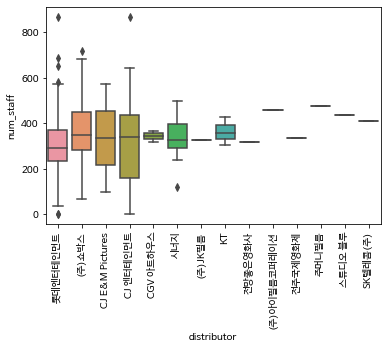

In [ ]:
# 배급사 별 스텝 수에 대한 박스 그래프 생성
axes = sns.boxplot(x=df_distributor_staff.distributor, y=df_distributor_staff.num_staff)
plt.xticks(rotation=90)

- 그래프 해석
  + 영화 제작 수가 11개 이상인 큰 제작자에서 주로 많은 수의 스텝을 고용한다는 것을 확인 가능
  + 많은 수의 스텝이 영화 제작에 참여하였으나 제작한 영화의 수가 1개 혹은 몹시 적어서 박스 그래프가 그려지지 않는 현상이 발생
  + 위의 배급사 별 장르에서 구한 제작 영화가 11개 이상인 배급사 목록으로 박스 그래프를 다시 생성
  + 이상치로 800명 이상의 스텝이 참여한 영화가 존재함을 알 수 있다.

In [ ]:
df.sort_values('num_staff', ascending=False)[['title','distributor','num_staff']].head(20)

,title,distributor,num_staff
372,국제시장,CJ 엔터테인먼트,869
505,해적: 바다로 간 산적,롯데엔터테인먼트,868
201,강남 1970,(주)쇼박스,719
320,최종병기 활,롯데엔터테인먼트,687
477,황해,(주)쇼박스,683
124,역린,롯데엔터테인먼트,650
310,순수의 시대,CJ 엔터테인먼트,642
498,암살,(주)쇼박스,628
487,대호,(주)NEW,612
48,빅매치,(주)NEW,600


(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

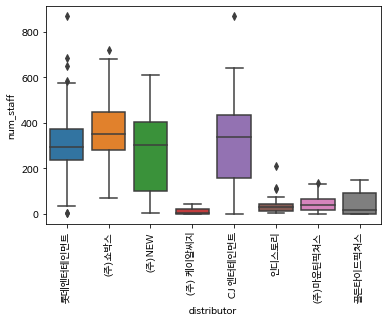

In [ ]:
# 영화 제작 수가 11개 이상인 배급사의 데이터만 추출 후 df_distributor_staff_2에 저장 후 박스 그래프 생성
df_distributor_staff_2 = df[df['distributor'].isin(db.index)]

axes = sns.boxplot(x=df_distributor_staff_2.distributor, y=df_distributor_staff_2.num_staff)
plt.xticks(rotation=90)

- 그래프 해석
  + 롯데엔터테인먼트, 쇼박스, NEW, CJ엔터테인먼트는 많은 수의 스텝 수를 영화 제작에 참여시키는 배급사임을 확인할 수 있다.
  + 스텝 수가 적은 배급사를 살펴보면, 케이알씨지를 제외하고는 다큐멘터리를 주로 제작하는 배급사이다.
  + 모든 배급사가 드라마 장르의 영화를 많이 제작하여 평균에 영향을 미쳤을 수 있으므로 드라마 장르를 제외하여 다시 박스 그래프를 생성해 다큐멘터리 장르 영화 제작에는 적은 스텝 수가 들어간다는 가설을 확인한다.

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

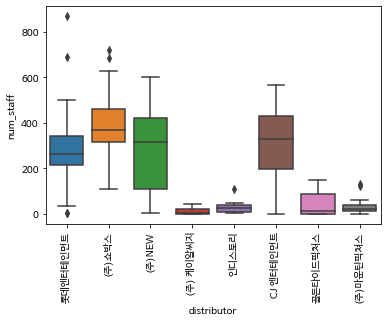

In [ ]:
# 위의 데이터에서 장르가 드라마인 영화 제외 후 그래프 생성
df_distributor_staff_3 = df_distributor_staff_2[df_distributor_staff_2['genre']!='드라마']
axes = sns.boxplot(x=df_distributor_staff_3.distributor, y=df_distributor_staff_3.num_staff)
plt.xticks(rotation=90)

In [ ]:
# 다큐멘터리 장르 영화의 스텝 수 확인
df[df['genre']=="다큐멘터리"].sort_values('num_staff',ascending=False)[['title','distributor','genre','num_staff']]

,title,distributor,genre,num_staff
197,만신,(주)엣나인필름,다큐멘터리,227
557,목숨,필라멘트 픽쳐스,다큐멘터리,139
255,누구에게나 찬란한,CGV아트하우스,다큐멘터리,125
469,그 사람 추기경,(주)프레인글로벌,다큐멘터리,54
228,회복,스토리셋,다큐멘터리,54
...,...,...,...,...
125,하쿠나 마타타 - 지라니 이야기,이모션 픽처스,다큐멘터리,0
394,인피니트 콘서트 세컨드 인베이전 에볼루션 더 무비 3D,골든타이드픽처스,다큐멘터리,0
290,훈장과 악동들,어뮤즈,다큐멘터리,0
173,법정스님의 의자,(주)키노아이,다큐멘터리,0


- 결론
  + 제작 영화 개수가 많은 큰 배급사에서는 많은 수의 스텝을 영화 제작에 참여시킨다.
  + 다큐멘터리 장르의 영화 제작에는 적은 수의 스텝이 참여한다는 것을 알 수 있다.

## 4-3) 개봉일 별 관객 수

In [ ]:
# release_time 변수에서 날짜와 월을 추출하여 각각 day, month 칼럼 생성
df['day'] = df['release_time'].dt.day
df['month'] = df['release_time'].dt.month

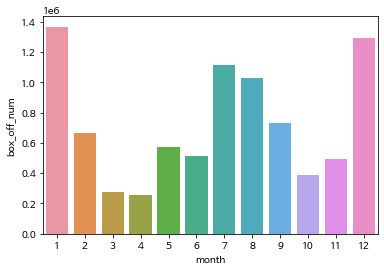

In [ ]:
# 월별 관객 수에 대한 바 그래프 생성
month_box_off_num = df[['month','box_off_num']].groupby('month').mean().sort_values('box_off_num',ascending=False)
axes = sns.barplot(x=month_box_off_num.index, y=month_box_off_num.box_off_num)

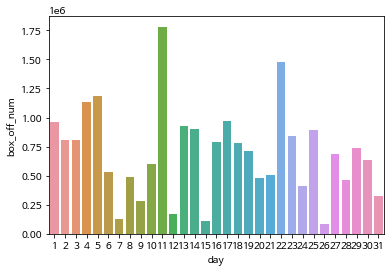

In [ ]:
# 일별 관객 수에 대한 바 그래프 생성
day_box_off_num = df[['day','box_off_num']].groupby('day').mean().sort_values('box_off_num',ascending=False)
axes = sns.barplot(x=day_box_off_num.index, y=day_box_off_num.box_off_num)

- 결론
  + 1월, 12월 즉 연말, 연초에 관객수가 상대적으로 많다는 것을 알 수 있다.
  + 일별 관객 수 그래프에서는 특별한 규칙성을 찾을 수 없는 것으로 보아 날짜와(월초, 월말 등) 관객 수는 큰 연관이 없음을 알 수 있다.

## 4-4) 계절별 장르 관객 수
- 월별 장르와 월별 개봉영화 수에 대한 그래프에서 유의미한 관계가 발견되지 않아 계절 별 장르에 따른 관객 수에 대한 그래프를 그려보기로 결정

In [ ]:
# 계절에 대한 칼럼 추가

def season(x):
  if ((x>=3) & (x<=5)):
    return 'spring'
  elif ((x>=6) & (x<=8)):
    return 'summer'
  elif ((x>=9) & (x<=11)):
    return 'fall'
  else:
    return 'winter'

df['season'] = df['month'].apply(season)
df.head(10)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,day,month,season
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.00,0,91,2,23398,22,11,fall
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501,19,11,fall
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083,5,6,summer
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866,12,7,summer
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387,4,11,fall
5,강철대오 : 구국의 철가방,롯데엔터테인먼트,코미디,2012-10-25,113,15세 관람가,육상효,837969.00,2,262,4,233211,25,10,fall
6,길위에서,백두대간,다큐멘터리,2013-05-23,104,전체 관람가,이창재,0.00,0,32,5,53526,23,5,spring
7,회사원,(주)쇼박스,액션,2012-10-11,96,청소년 관람불가,임상윤,739522.00,3,342,2,1110523,11,10,fall
8,"1789, 바스티유의 연인들",유니버설픽쳐스인터내셔널코리아,뮤지컬,2014-09-18,129,전체 관람가,정성복,0.00,0,3,5,4778,18,9,fall
9,청춘그루브,(주)두타연,드라마,2012-03-15,94,15세 관람가,변성현,0.00,0,138,3,868,15,3,spring


In [ ]:
# 계절 별 장르 영화의 관객 수

genre_num = df.groupby(['season', 'genre'])['box_off_num'].mean().sort_values(ascending = False)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

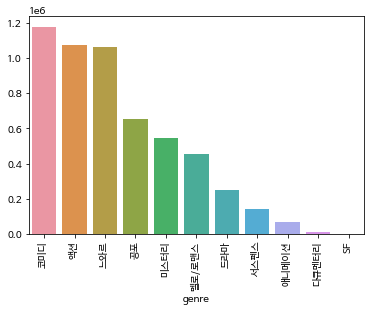

In [ ]:
# 봄: 장르 별 관객 수

axes1 = sns.barplot(genre_num['spring'].index, genre_num['spring'].values)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

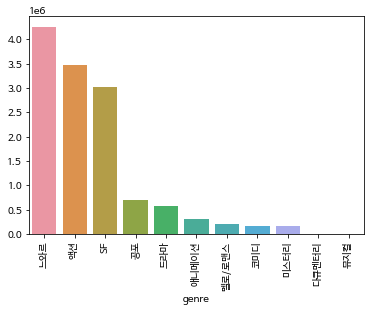

In [ ]:
# 여름: 장르 별 관객 수

axes2 = sns.barplot(genre_num['summer'].index, genre_num['summer'].values)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

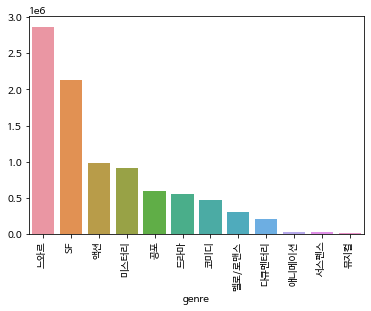

In [ ]:
# 가을: 장르 별 관객 수

axes3 = sns.barplot(genre_num['fall'].index, genre_num['fall'].values)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

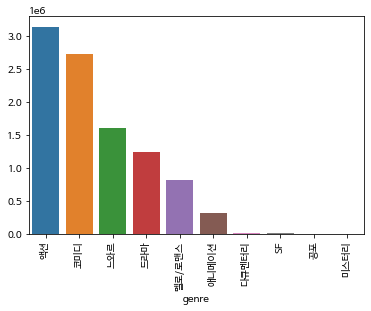

In [ ]:
# 겨울: 장르 별 관객 수

axes4 = sns.barplot(genre_num['winter'].index, genre_num['winter'].values)
plt.xticks(rotation=90)

- 결론
  + 봄에는 코미디, 여름과 가을에는 느와르, 겨울에는 액션 영화의 관객 수가 가장 많다.
  + 봄과 겨울에는 여름과 가을에 비해 SF 장르의 관객 수가 현저히 적다.(영화 수 자체도 적을 것으로 예상)